## Can the  Returns of Bitcoin be Predicted Using the Returns of Other Cyptocurencies?


#### The following are the R packages that is  used in this project

In [1]:

library(crypto2)        #   Retrieves crypto currency information and historical prices as well as information on the exchanges they are listed on. 
library(timeSeries)     #  'S4' classes and various tools for financial time series.
library(tidyverse)      #  This package is designed to make it easy to install and load multiple 'tidyverse' packages in a single step. 
library(ggplot2)        #     A system for 'declaratively' creating graphics, based on "The Grammar of Graphics". 
library(ggpubr)         #   The 'ggplot2' package is excellent and flexible for elegant data visualization in R. 
library(report)         #   This package converts statistical models and data frames into textual reports suited for publication, ensuring standardization and quality in results reporting.
library(aTSA)           #   Contains some tools for testing, analyzing time series data and fitting popular time series models such as ARIMA, Moving Average and Holt Winters, etc. Most functions also provide nice and clear outputs like SAS does, such as identify, estimate and forecast, which are the same 
library(robustbase)     #   " Essential" Robust Statistics. Tools allowing you to analyze data with robust methods.  
library(lmtest)         #   A collection of tests, data sets, and examples for diagnostic checking in linear regression models. Furthermore, some generic tools for inference in parametric models are provided.
library(olsrr)          #   Tools designed to make it easier for users, particularly beginner/intermediate R users to build ordinary least squares regression models. Includes comprehensive regression output, heteroskedasticity tests, collinearity diagnostics, residual diagnostics, measures of influence, model fit assessment and variable selection procedures.



ERROR: Error in library(crypto2): there is no package called 'crypto2'


#### 1. Introduction

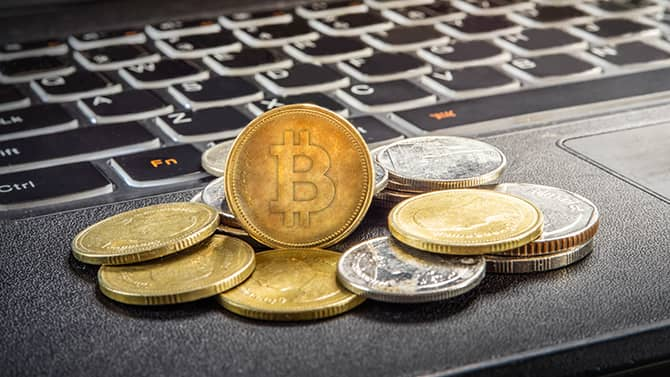

Cryptocurrencies are forms of currency that exist digitally or virtually and use cryptography to secure transactions. They do not have a central issuing or regulating authority, instead using a decentralized system to record transactions and issue new units. Units of the currencies are created through a process called mining, which involves using computer power to solve complicated mathematical problems that generate coins.

Cryptocurrencies run on the blockchain (a distributed public ledger), where a record of all transactions is updated and held by currency holders. Satoshi Nakamoto created the first cryptocurrency, Bitcoin, in 2009, and it is the most traded cryptocurrency. 
Cryptocurrencies are one of the most volatile and risky assets to trade among finance experts and traders. So this calls for a more in-depth investigation into them before trading.

This project was done to help investigate whether the returns of bitcoin can be predicted using the returns of other cryptocurrencies.


####  2. Download the cryptocurrencies data from CoinMarketCap.


In [2]:
Active_coins <- crypto_list(only_active = TRUE)    # It retrieves lists of active historical data for cryptocurrencies.

cryptodata <- crypto_history(coin_list = Active_coins,limit = 5, start_date = "20211107", end_date="20221109")    # Retrieve four of the active cryptocurrencies from 2021-11-09 to 2022-11-09.



cryptodata_reedited<- subset(cryptodata, select = c(timestamp, symbol,name, close ))      # Subset the data for the historical data on timestamp, symbol, name, and close.
cryptodata_reedited['date'] <- as.Date(cryptodata_reedited$timestamp)     # Convert the time stamp to a date for convenience.

head(cryptodata_reedited) #  Visualize the beginning of the cryptodata_reedited data frame using the head function.


ERROR: Error in crypto_list(only_active = TRUE): could not find function "crypto_list"


#### 3. Subset, convert, and join the close values into returns in one dataframe using 'subset' , 'timeseries', and 'tidyverse' packages.

In [3]:


Bitcoin <- subset(cryptodata_reedited, name == 'Bitcoin', select = c(date, close))  #  Subset Bitcoin from the data, select its date, and close columns.
Bitcoin['close'] <- returns(Bitcoin$close)    #  Convert the close values to returns using the timeseries package.
colnames(Bitcoin)[2]<- 'bitcoin_returns'      #  Name the second column bitcoin_returns.

Litecoin <- subset(cryptodata_reedited, name == 'Litecoin', select = c(date, close))   # Subset Litecoin from the data, select its date, and close columns.
Litecoin['close'] <- returns(Litecoin$close)    #  Convert the close values to returns using the timeseries package.
colnames(Litecoin)[2]<- 'litecoin_returns'      #  Name the second column, litecoin_returns.


Namecoin<- subset(cryptodata_reedited, name == 'Namecoin', select = c(date, close))     #  Subset Namecoin from the data, select its date, and close columns
Namecoin['close'] <- returns(Namecoin$close)    #  Convert the close values to returns using the timeseries package.
colnames(Namecoin)[2]<- 'namecoin_returns'      #   Name the second column. namecoin_returns.

Terracoin <- subset(cryptodata_reedited, name == 'Terracoin' , select = c(date, close)) # Subset Terracoin from the data, select its date, and close columns.
Terracoin['close'] <- returns(Terracoin$close)    #  Convert the close values to returns using the timeseries package.

colnames(Terracoin)[2]<- 'terracoin_returns'      # Name the second column, terracoin_returns.
Almost_final_data <- Bitcoin %>% inner_join(Litecoin, by = 'date') %>% inner_join(Namecoin, by = 'date') %>% inner_join(Terracoin, by ='date') #  Join the returns to form a data frame using the tidyverse package for further statistical analysis.

final_data <- Almost_final_data[-1, c(2,3,4,5,6)] #  Delet the first empty raw and assign it to final_data

head(final_data)  # Using the head function, visualize the beginning of the final_data data frame.

ERROR: Error in subset(cryptodata_reedited, name == "Bitcoin", select = c(date, : object 'cryptodata_reedited' not found


#### 4. Check the stationarity of the time series variables (bitcoin_returns, litecoin_returns, namecoin_returns, and terracoin_returns).
##### Checking the stationarity ensures that the statistical properties of the variables do not depend on the time at which the time series was observed. A regression on non-stationary variables yields an inaccurate result. In this project, two tests are used: the Augmented Dickey-Fuller Test and the Phillips-Perron Unit Root Test, both with the alternative hypothesis of "stationary."

In [2]:

#-------                                    Augmented Dickey-Fuller Test 
#                                             alternative: stationary 

# 1.Using the Augmented Dickey-Fuller Test, determine the stationarity of all cryptocurrency returns.


stationary.test(final_data$bitcoin_returns)          #  The aTSA package's Augmented Dickey-Fuller Test is used to check the stationarity of bitcoin_returns.
 
# Interpretation: With a maximum lag of 5, the returns of Bitcon (bitcoin_returns) are stationary across all three kinds of the Augmented Dickey-Fuller Test (Type 1: no drift no trend, Type 2: with drift no trend, and Type 3: with drift and trend ).


stationary.test(final_data$litecoin_returns)    #   The aTSA package's Augmented Dickey-Fuller Test is used to check the stationarity of litecoin_returns.

#Interpretation: With a maximum lag of 5, the returns of litecoin (litecoin_returns) are stationary across all three kinds of the Augmented Dickey-Fuller Test (Type 1: no drift no trend, Type 2: with drift no trend, and Type 3: with drift and trend).


stationary.test(final_data$namecoin_returns)        #   The Augmented Dickey-Fuller Test from the aTSA package is used to check the stationarity of  namecoin_returns.

# Interpretation: With a maximum lag of 5, the returns of namecoin (namecoin_returns) are stationary across all three kinds of the Augmented Dickey-Fuller Test (Type 1: no drift no trend, Type 2: with drift no trend, and Type 3: with drift and trend ).


stationary.test(final_data$terracoin_returns)      # The Augmented Dickey-Fuller Test from the aTSA package is used to check the stationarity of terracoin_returns.

# Interpretation: With a maximum lag of 5, the returns of terracoin (terracoin_returns) are stationary across all three kinds of the Augmented Dickey-Fuller Test (Type 1: no drift no trend, Type 2: with drift no trend, and Type 3: with drift and trend ).


Note: In fact, p.value = 0.01 means p.value < = 0.01.




#-------                               Phillips-Perron Unit Root Test 
#          alternative: stationary  


#   Check the stationarity of all the returns of the cryptocurrencies using the Phillips-Perron Unit Root Test to confirm the results from Augmented Dickey-Fuller. This is because the Phillips-Perron test makes corrections to the test statistics and is robust to the unspecified autocorrelation and heteroscedasticity in the errors.
                                    


# Note: p-value = 0.01 means p.value <= 0.01 

stationary.test(final_data$bitcoin_returns, method = c( "pp"), type = c( "Z_tau"), lag.short = TRUE)  # The stationarity of bitcoin_returns is checked using the aTSA  package's Phillips-Perron unit root test.

# Interpretation: With a maximum lag of 5, the returns of Bitcon (bitcoin_returns) are stationary across all three kinds of the Phillips-Perron Unit Root Test (Type 1: no drift no trend , Type 2: with drift no trend, and Type 3: with drift and trend).
 

 
stationary.test(final_data$litecoin_returns, method = c( "pp"), type = c( "Z_tau"), lag.short = TRUE) #   The Phillips-Perron Unit Root Test from the aTSA  package is used to test Litecoin's stationarity.
# Interpretation: With a maximum lag of 5, the returns of litecoin (litecoin_returns) are stationary across all three kinds of the Phillips-Perron Unit Root Test (Type 1: no drift no trend , Type 2: with drift no trend, and Type 3: with drift and trend).
  

stationary.test(final_data$namecoin_returns, method = c( "pp"), type = c( "Z_tau"), lag.short = TRUE) # The stationarity of namecoin_returns is checked using the aTSA package's Phillips-Perron unit root test.
# Interpretation: With a maximum lag of 5 the returns of namecoin (namecoin_returns) are stationary across all three kinds of the Phillips-Perron Unit Root Test (Type 1: no drift no trend , Type 2: with drift no trend, and Type 3: with drift and trend).



stationary.test(final_data$terracoin_returns, method = c( "pp"), type = c( "Z_tau"), lag.short = TRUE)  # The stationarity of terracoin_returns is checked using the aTSA package's Phillips-Perron Unit Root Test.

# Interpretation: With a maximum lag of 5, the returns of terracoin (terracoin_returns) are stationary across all three kinds of the Phillips-Perron Unit Root Test (Type 1: no drift no trend , Type 2: with drift no trend, and Type 3: with drift and trend).

Note: p-value = 0.01 means p.value <= 0.01 



ERROR: Error in parse(text = x, srcfile = src): <text>:28:10: unexpected symbol
27: 
28: Note: In fact
             ^


#### 5. To test for statistical significance, regress bitcoin_returns on litecoin_returns, namecoin_returns, and terracoin_returns using the ordinary least squares method.


In [9]:

reglm<- lm(bitcoin_returns~ litecoin_returns + namecoin_returns +terracoin_returns , data =final_data)    # This is a linear regression model containing the four cryptocurrencies' returns, and it is assigned to reglm.

summary(reglm)   # It prints the summary report of the linear regression assigned to reglm.



ERROR: Error in is.data.frame(data): object 'final_data' not found


#### 6. From the above model (reglm) the intercept and terracoin_returns are not statistically significant, so to produce accurate results, they should be removed from the equation. So the equation below is pustulated.



In [ ]:
reglm_int<- lm(bitcoin_returns~ litecoin_returns + namecoin_returns +0 , data =final_data)    # In this model, the intercept and terracoin_returns are removed because they are not statistically significant. The results are assigned to reglm_int.

summary(reglm_int)   # It prints the summary report of the linear regression assigned to reglm_int.


##### 6.1 Check the model (reglm_int) for outliers. This is because they have the capability of influencing the results.


In [ ]:
ols_plot_resid_lev(reglm_int) # It produces a graph for detecting outliers and/or observations with high leverage using the olsrr package.

ols_plot_cooksd_chart(reglm) # Chart of cook's distance to detect observations that strongly influence fitted values of the model.



The results show that there are outliers in our model capable of influencing the results. So we need a model that is robust to outliers.


##### 6.2 The results above indicate the presence of outliers. To take care of that, an MM-type estimator for linear regression is estimated,  and assigned to regrob.


In [ ]:
regrob <- lmrob(bitcoin_returns~ litecoin_returns + namecoin_returns +0 , data =final_data)    # This is a MM-type estimator for linear regression that is robust to outliers using the robustbase package and assigned to regrob.

summary(regrob)    # It prints the summary report of the robust MM-typeestimatorss forlinearrregression.


#### 7. Both the results from both models (reglm_in and regrob) are put into a single table using the "Stargazer" package for the final conclusion and remarks.


In [ ]:
stargazer(reglm,reglm_int, regrob, title="This table shows that the return of Bicon can be predicted with the returns of litecoin and  Namecoin", type = 'text')  # It put the summary report of the regression models together in the table using the "Stargazer" package.